# 0.Load data from netCDF

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = xr.open_dataset('test.nc')

# 1.List band

In [4]:
list(dataset.data_vars.keys())

['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']

# 2.Select Band

In [5]:
green = dataset.green

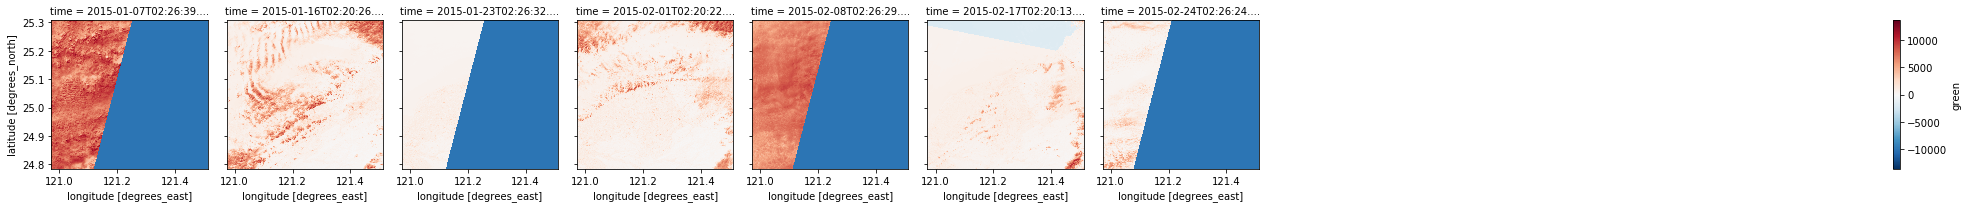

In [6]:
green.plot(col='time', col_wrap=10)

# 3.Use where

In [7]:
autumn = dataset.green.where(dataset.pixel_qa == 322)

In [13]:
autumn_valid = autumn.where(autumn != -9999)

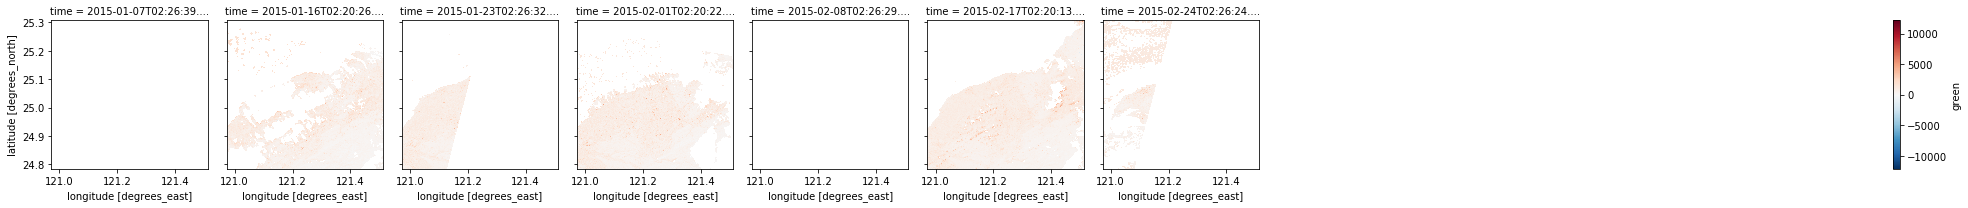

In [14]:
autumn_valid.plot(col='time', col_wrap=10)

# 4.NDVI example

In [18]:
red = dataset.red.where(dataset.red != -9999).where(dataset.pixel_qa == 322)
nir = dataset.nir.where(dataset.nir != -9999).where(dataset.pixel_qa == 322)

ndvi = ((nir - red) / (nir + red)).where((nir - red) / (nir + red) <= 1).where((nir - red) / (nir + red) >= -1)
ndvi

<xarray.DataArray (time: 7, latitude: 1942, longitude: 2001)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ..., 0.871619, 0.881102],
        [     nan,      nan, ..., 0.845351, 0.861404]],

       ...,

       [[     nan,      nan, ..., 0.032112, 0.027207],
        [     nan,      nan, ..., 0.031972, 0.028186],
        ...,
        [0.215563, 0.253285, ...,      nan,      nan],
        [0.180013, 0.160904, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan

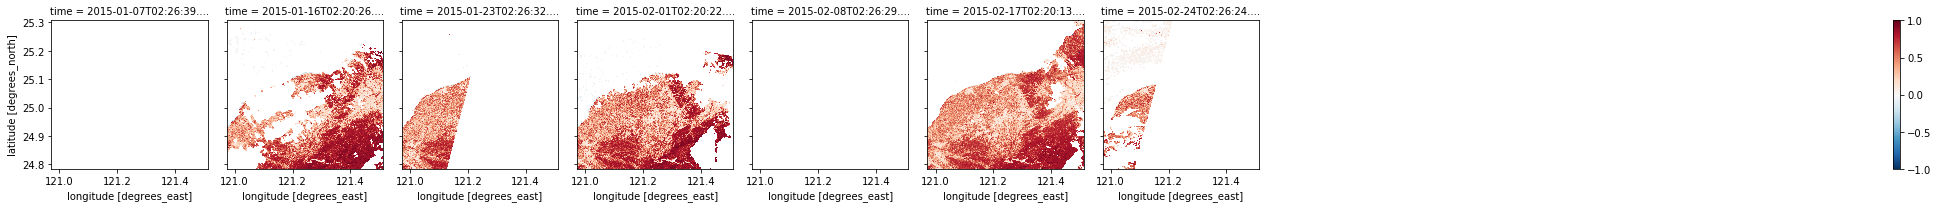

In [19]:
ndvi.plot(col='time', col_wrap=10)

In [33]:
cloud_free = dataset.pixel_qa.where(dataset.pixel_qa != 1).where(dataset.pixel_qa == 322) / 322
mostly_cloud_free = cloud_free.sum(dim=('latitude','longitude')) > (0.3 * cloud_free.size / cloud_free.time.size)
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
mostly_good_ndvi

<xarray.DataArray (time: 3, latitude: 1942, longitude: 2001)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ..., 0.871619, 0.881102],
        [     nan,      nan, ..., 0.845351, 0.861404]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.646038, 0.440906, ...,      nan,      nan],
        [0.393584, 0.427406, ...,      nan,      nan]],

       [[     nan,      nan, ..., 0.032112, 0.027207],
        [     nan,      nan, ..., 0.031972, 0.028186],
        ...,
        [0.215563, 0.253285, ...,      nan,      nan],
        [0.180013, 0.160904, ...,      nan,      nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2015-01-16T02:20:26.539887 ... 2015-02-17T02:20:13.900481
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 ... 24.78 24.78 24.78
  * longitude  (longitude) float64 121.0 121.

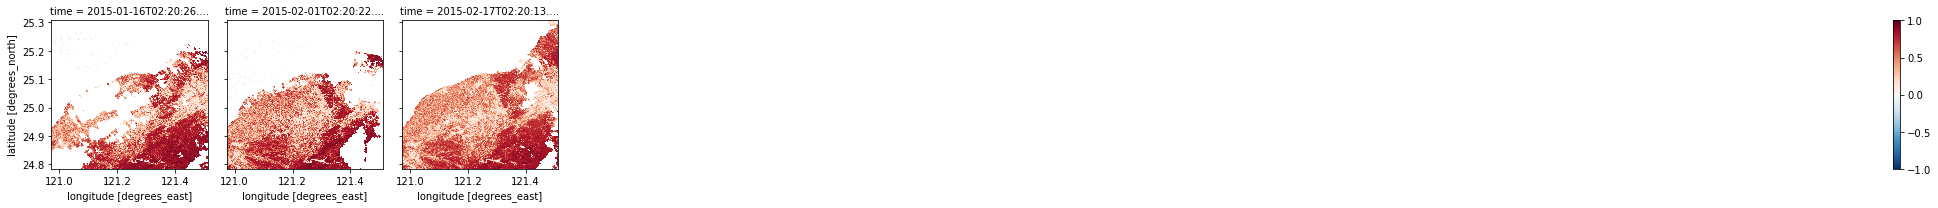

In [34]:
mostly_good_ndvi.plot(col='time', col_wrap=10)

/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


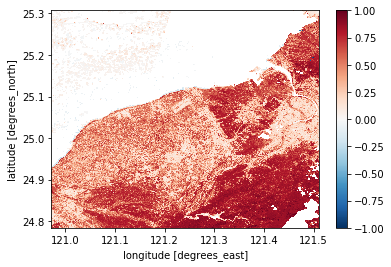

In [35]:
ndvi.median(dim='time').plot()

/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/xarray/core/nputils.py:220: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


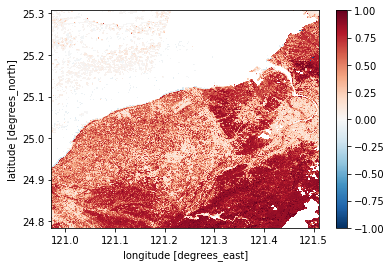

In [36]:
ndvi.max(dim='time').plot()

/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


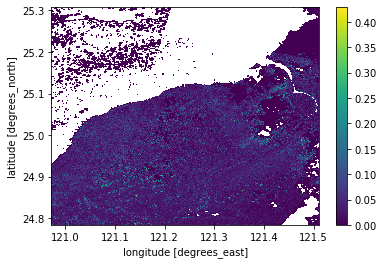

In [37]:
ndvi.std(dim='time').plot()

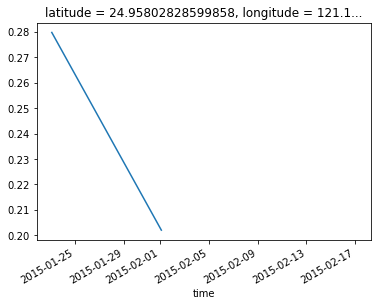

In [38]:
ndvi.sel(latitude=24.958132, longitude=121.126085, method='nearest').plot() #取出某一個點的資料做圖

# 5.Cloud free process

In [39]:
data = dataset
cloud_free_green = data.green.where(data.green > 0).where(data.pixel_qa == 322)
cloud_free_red = data.red.where(data.red > 0).where(data.pixel_qa == 322)
cloud_free_blue = data.blue.where(data.blue > 0).where(data.pixel_qa == 322)
cloud_free_nir = data.nir.where(data.nir > 0).where(data.pixel_qa == 322)
cloud_free_swir1 = data.swir1.where(data.swir1 > 0).where(data.pixel_qa == 322)
cloud_free_swir2 = data.swir2.where(data.swir2 > 0).where(data.pixel_qa == 322)

In [40]:
combine_green = cloud_free_green.median(dim='time')
combine_red = cloud_free_red.median(dim='time')
combine_blue = cloud_free_blue.median(dim='time')
combine_nir = cloud_free_nir.median(dim='time')
combine_swir1 = cloud_free_swir1.median(dim='time')
combine_swir2 = cloud_free_swir2.median(dim='time')

/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


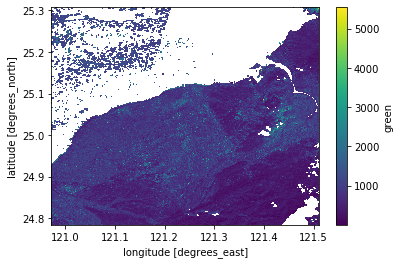

In [41]:
combine_green.plot()

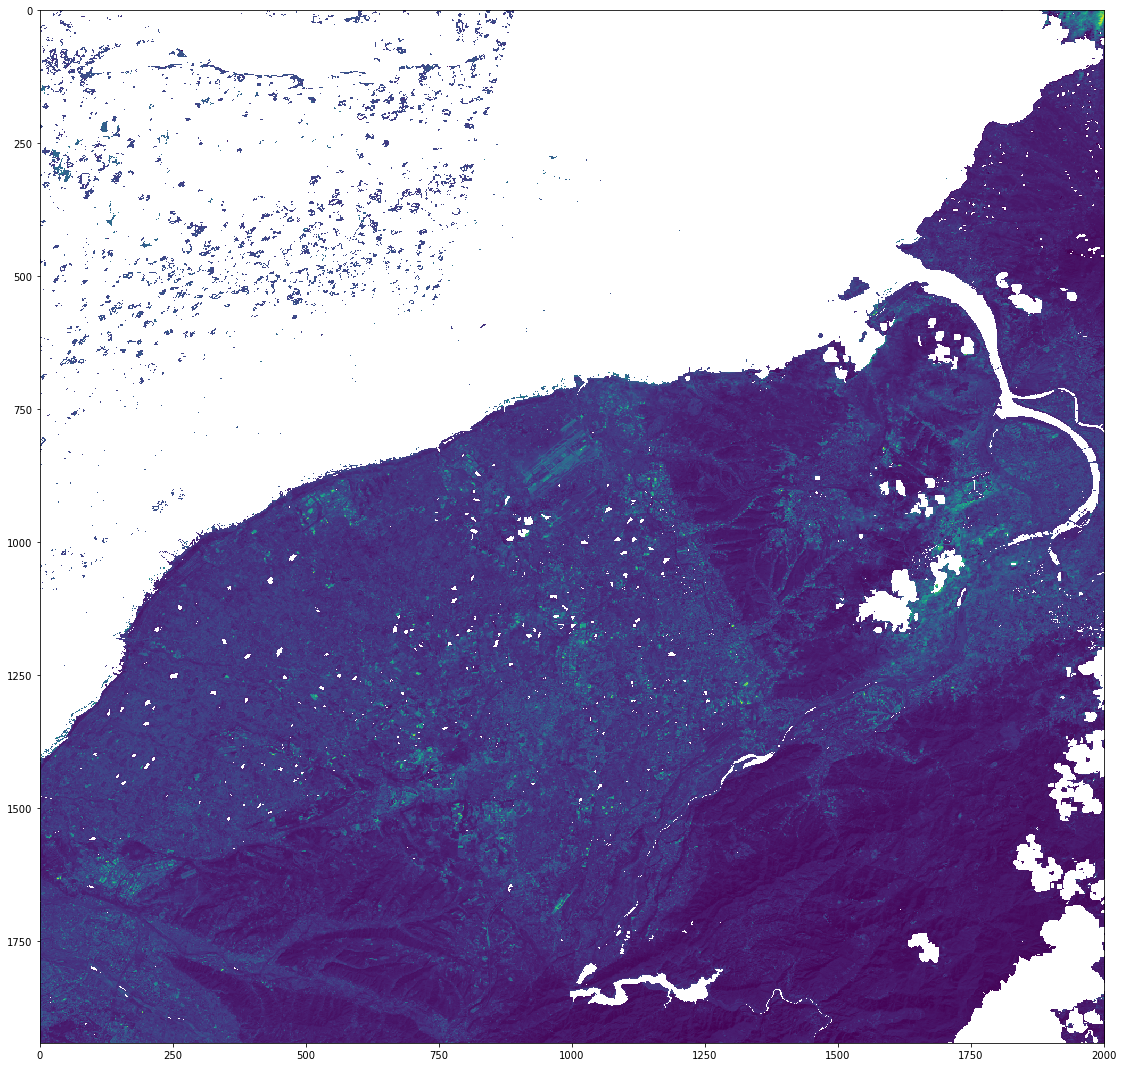

In [42]:
max_val = combine_green.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (combine_green / max_val)
# 設定scaled

from matplotlib import pyplot as plt
#plt.imshow(scaled.isel(time=19))
plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')

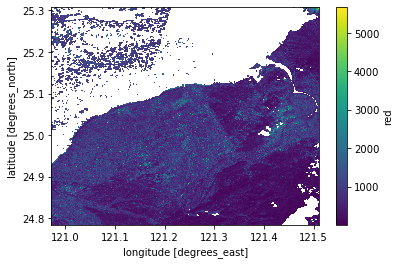

In [43]:
combine_red.plot()

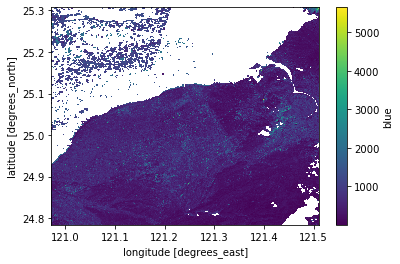

In [44]:
combine_blue.plot()

In [46]:
import xarray as xr
test = xr.Dataset({})
for band in list(dataset.data_vars.keys()):
    if band != 'pixel_qa':
        temp1 = data.get([band]).where(data.get([band]) > 0).where(data.pixel_qa == 322).median(dim='time')
        test = test.merge(temp1)
test

/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/opt/miniconda3/envs/cubeenv/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


<xarray.Dataset>
Dimensions:    (latitude: 1942, longitude: 2001)
Coordinates:
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 ... 24.78 24.78 24.78
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 ... 121.5 121.5 121.5
Data variables:
    red        (latitude, longitude) float64 nan nan nan ... 167.0 163.0 158.0
    green      (latitude, longitude) float64 nan nan nan ... 281.0 297.0 280.0
    blue       (latitude, longitude) float64 nan nan nan ... 109.0 124.0 109.0
    nir        (latitude, longitude) float64 nan nan nan ... 1.945e+03 2.122e+03
    swir1      (latitude, longitude) float64 nan nan nan ... 956.0 1.046e+03
    swir2      (latitude, longitude) float64 nan nan nan ... 521.0 490.0 497.0

In [50]:
from utils.dc_utilities import write_geotiff_from_xr, write_png_from_xr
import os
path = os.path.abspath('.') 
measurements = list(dataset.data_vars.keys()).copy()
measurements.remove('pixel_qa')
measurements
write_geotiff_from_xr(path + "/taipei_cloud_remove_new.tiff", test, measurements, nodata=0, crs="EPSG:4326")

# 6.Multicolor process

In [51]:
combine = combine_green.to_dataset(name = "green")
combine = combine.merge(combine_red.to_dataset(name = "red"))
combine = combine.merge(combine_blue.to_dataset(name = "blue"))

In [52]:
combine

<xarray.Dataset>
Dimensions:    (latitude: 1942, longitude: 2001)
Coordinates:
  * latitude   (latitude) float64 25.31 25.31 25.31 25.31 ... 24.78 24.78 24.78
  * longitude  (longitude) float64 121.0 121.0 121.0 121.0 ... 121.5 121.5 121.5
Data variables:
    green      (latitude, longitude) float64 nan nan nan ... 281.0 297.0 280.0
    red        (latitude, longitude) float64 nan nan nan ... 167.0 163.0 158.0
    blue       (latitude, longitude) float64 nan nan nan ... 109.0 124.0 109.0

In [53]:
rbg = combine.to_array(dim='color').transpose('latitude', 'longitude', 'color')

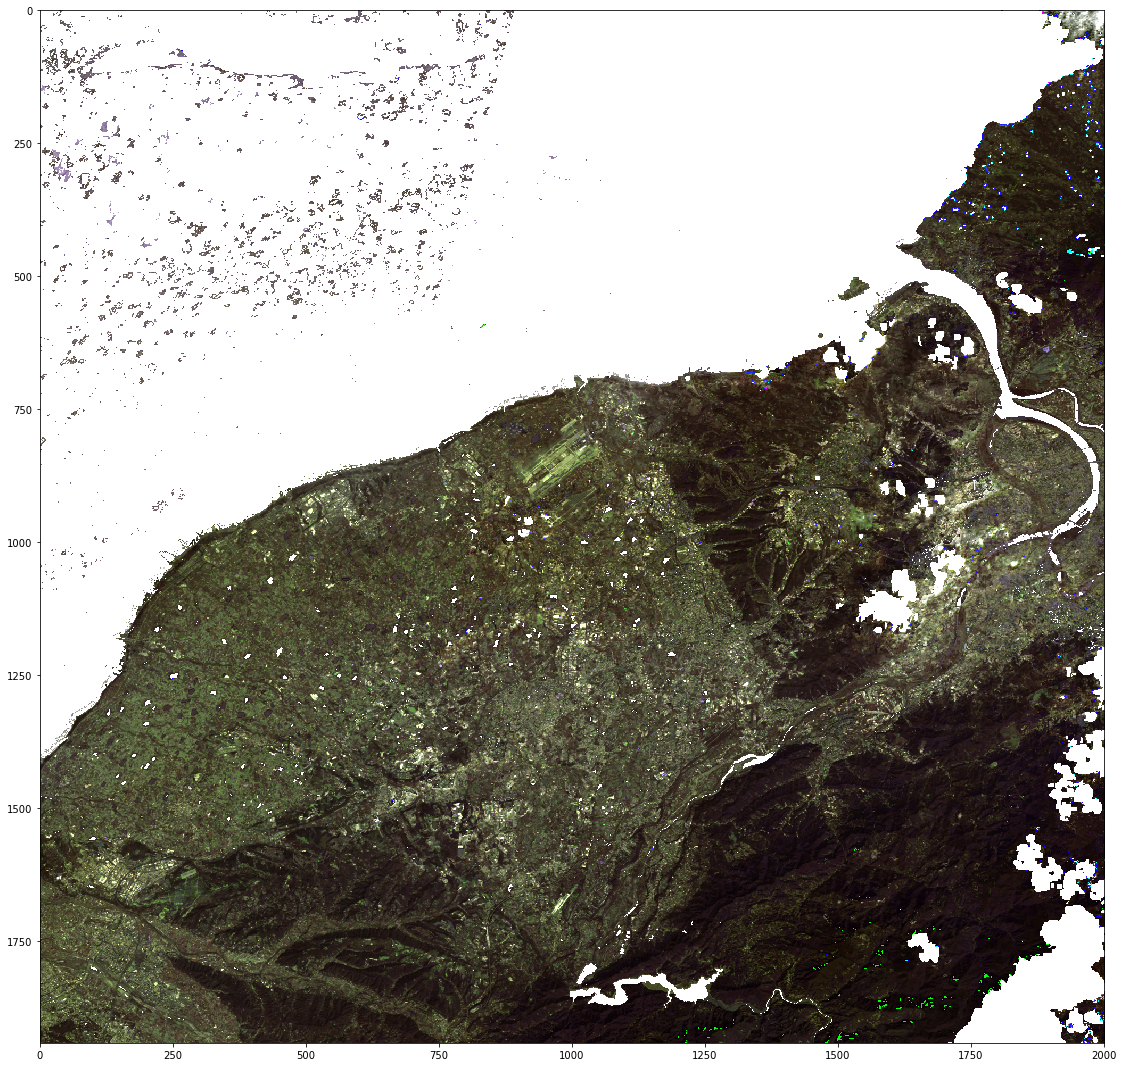

In [54]:
fake_saturation = 3000
# 這個是用來當作影像值得上限，超過就用3000取代
clipped_visible = rbg.where(rbg < fake_saturation).fillna(fake_saturation)
# 上面這邊就是這樣做，透過fillna()函式可以填入值
max_val = clipped_visible.max(['latitude', 'longitude'])
# 然後找最大的scale
scaled = (clipped_visible / max_val)
# 設定scaled

plt.figure(figsize = (100,19))
plt.imshow(scaled, interpolation='nearest')
# 最後就印出來，記得要import該import的東西

In [56]:
from utils.dc_utilities import write_geotiff_from_xr, write_png_from_xr
measurements = ['green','red','blue']
write_geotiff_from_xr(path + "/2014-2013_color-only.tiff", combine, measurements, nodata=0, crs="EPSG:4326")

In [57]:
#這個製出的圖顏色會怪怪的
write_png_from_xr(path + "/2015taipei_cloud_remove.png", combine, ['green','red','blue'], scale=[[255,0], [255,0], [255,0]])

In [55]:
#替代方案，用matplotlib製成png檔案
plt.imsave(path + "/2015taipei_cloud_remove2.png", scaled)